In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [384]:
df = pd.read_csv('../output/hospital_visits.csv')

In [385]:
df

,visit_date,department,diagnosis,patient_id,age_group,gender,cost
0,2023-11-24,Cardiology,Hypertension,P5506,18-35,Male,3695.53
1,2023-12-13,Pediatrics,Migraine,P2424,36-55,Male,197.50
2,2023-04-22,Oncology,Migraine,P1434,36-55,Female,1141.18
3,2023-10-29,Neurology,Asthma,P1106,56-75,Male,3505.79
4,2023-06-24,Neurology,Diabetes,P4527,75+,Female,555.94
...,...,...,...,...,...,...,...
395,2023-03-20,Pediatrics,Fracture,P7176,0-17,Female,2932.11
396,2023-10-01,General Medicine,Asthma,P7853,36-55,Female,3523.09
397,2023-10-02,General Medicine,Fever,P2392,18-35,Male,3305.13
398,2023-07-01,Oncology,Fever,P1725,36-55,Female,4835.72


In [386]:
df['visit_date'] = pd.to_datetime(df['visit_date'])

In [387]:
department_cost = df.groupby("department")["cost"].sum().sort_values(ascending=False)
depart = department_cost.reset_index()
depart

,department,cost
0,General Medicine,199277.90
1,Cardiology,191631.18
2,Orthopedics,185112.13
3,Neurology,179571.56
4,Oncology,152026.57
5,Pediatrics,140162.23


Text(0.5, 1.0, 'Costs by department')

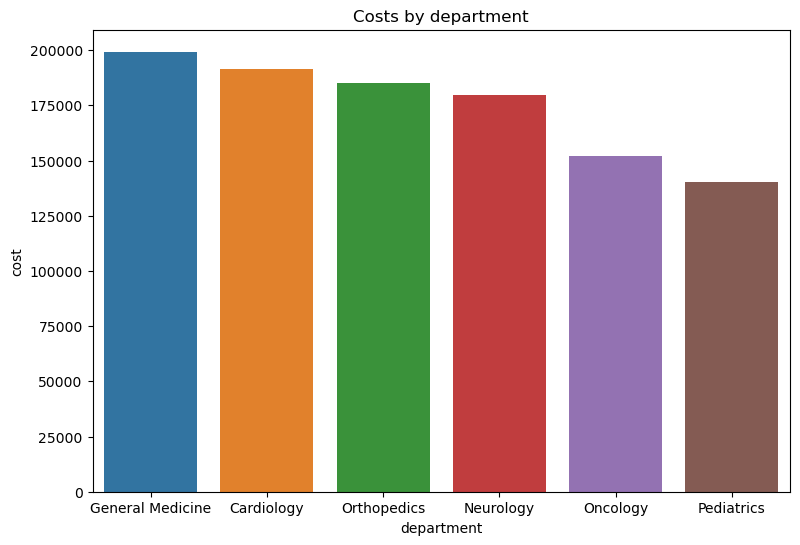

In [388]:
plt.figure(figsize=(9,6))
sns.barplot(x=depart['department'], y=depart['cost'])
plt.title('Costs by department')

In [389]:
gender_cost = df.groupby("gender")["cost"].sum().sort_values(ascending=False)
gender = gender_cost.reset_index()
gender

,gender,cost
0,Female,556325.81
1,Male,491455.76


Text(0.5, 1.0, 'Costs by gender')

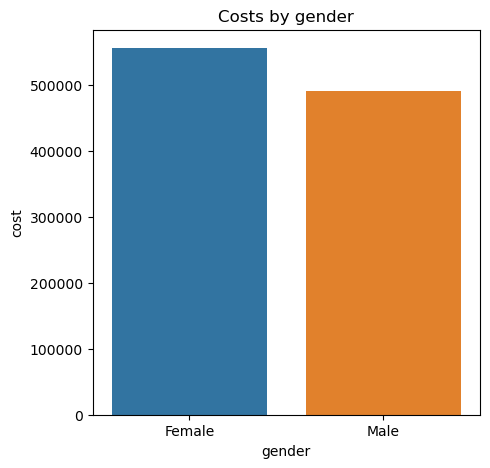

In [390]:
plt.figure(figsize=(5,5))
sns.barplot(x=gender['gender'], y=gender['cost'])
plt.title('Costs by gender')

In [391]:
age_cost = df.groupby("age_group")["cost"].sum()
age = age_cost.reset_index()
age

,age_group,cost
0,0-17,104905.01
1,18-35,313727.48
2,36-55,315128.74
3,56-75,208051.87
4,75+,105968.47


Text(0.5, 1.0, 'Costs by age group')

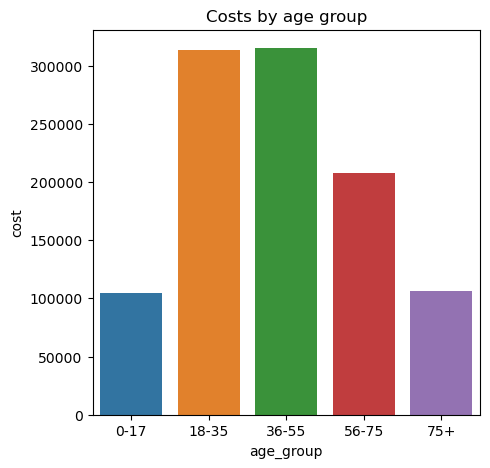

In [392]:
plt.figure(figsize=(5,5))
sns.barplot(x=age['age_group'], y=age['cost'])
plt.title('Costs by age group')

<Axes: title={'center': 'Avg cost per visit by age group'}, xlabel='age_group'>

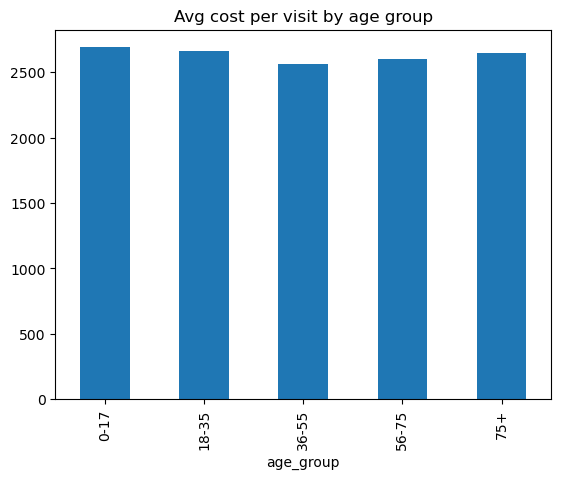

In [393]:
df.groupby("age_group")["cost"].mean().plot(kind="bar", title="Avg cost per visit by age group")

In [394]:
df['visit_month'] = df['visit_date'].dt.month_name()
df['visit_month'].value_counts()

October      46
May          45
June         38
February     34
December     33
September    33
November     32
January      32
July         29
March        28
August       26
April        24
Name: visit_month, dtype: int64

Text(0.5, 1.0, 'Costs by over time')

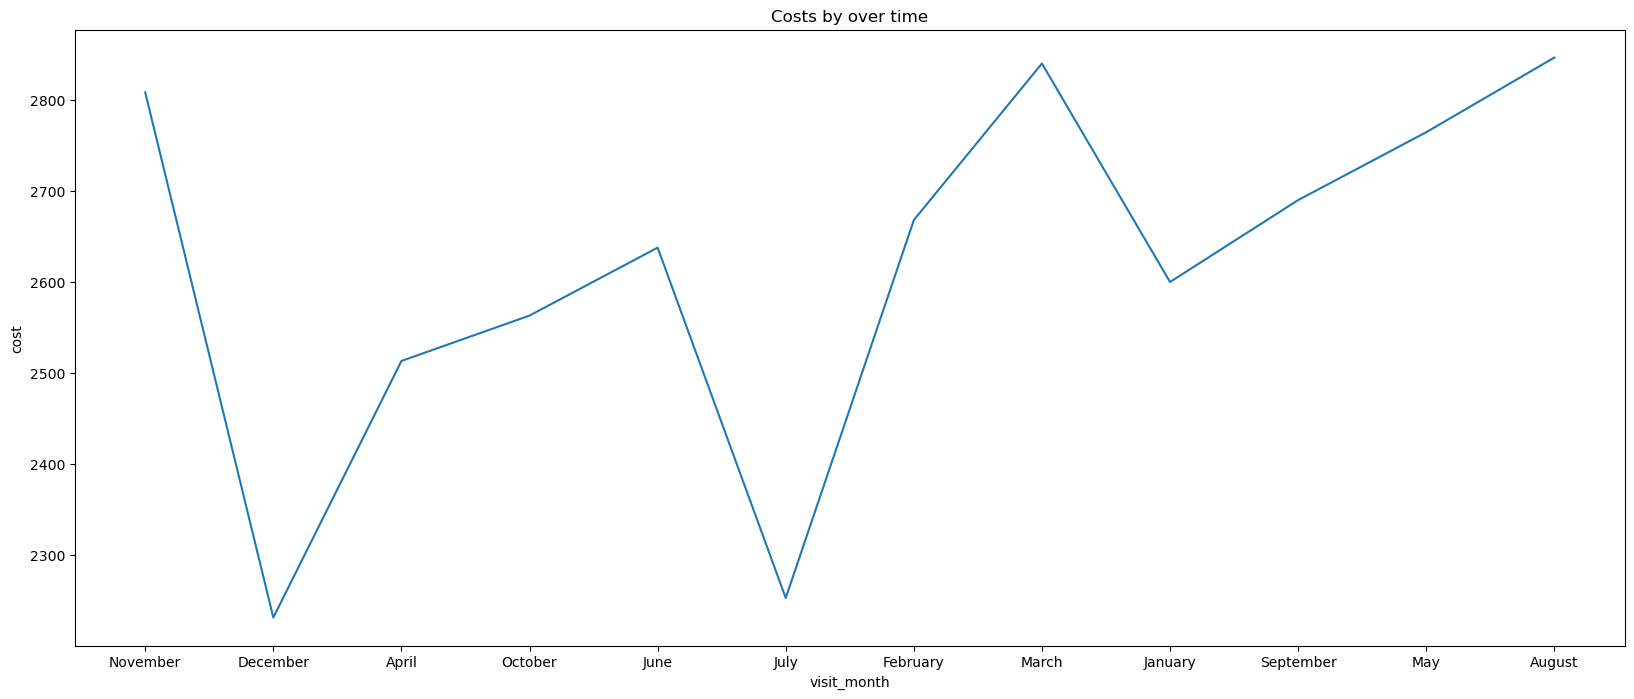

In [395]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df['visit_month'], y=df['cost'], errorbar=None)
plt.title('Costs by over time')

In [396]:
diagnosis = df['diagnosis'].value_counts()
diag = diagnosis.reset_index()
diag

,index,diagnosis
0,Cancer,74
1,Migraine,62
2,Fracture,60
3,Fever,59
4,Hypertension,53
5,Asthma,49
6,Diabetes,43


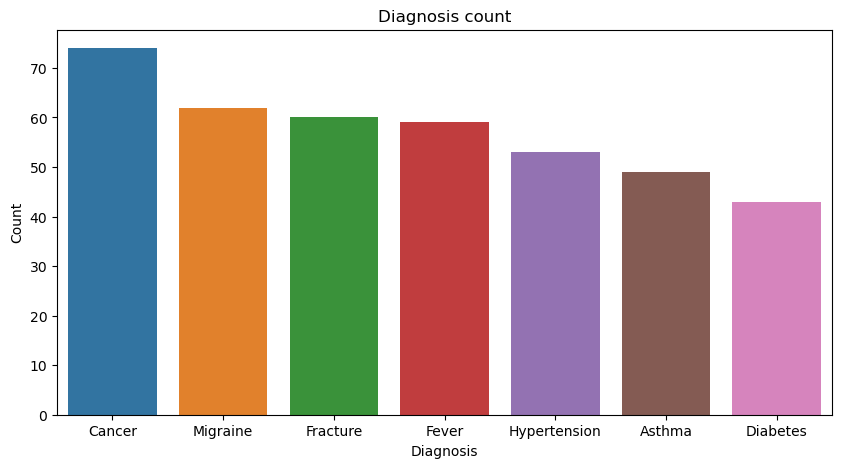

In [397]:
plt.figure(figsize=(10,5))
sns.barplot(x=diag['index'], y=diag['diagnosis'])
plt.title('Diagnosis count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [398]:
df.groupby("age_group")["cost"].sum()

age_group
0-17     104905.01
18-35    313727.48
36-55    315128.74
56-75    208051.87
75+      105968.47
Name: cost, dtype: float64

In [399]:
df.groupby("age_group")["cost"].mean()

age_group
0-17     2689.872051
18-35    2658.707458
36-55    2562.022276
56-75    2600.648375
75+      2649.211750
Name: cost, dtype: float64